## Практическое задание 7

### Якунина Е. Н.

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

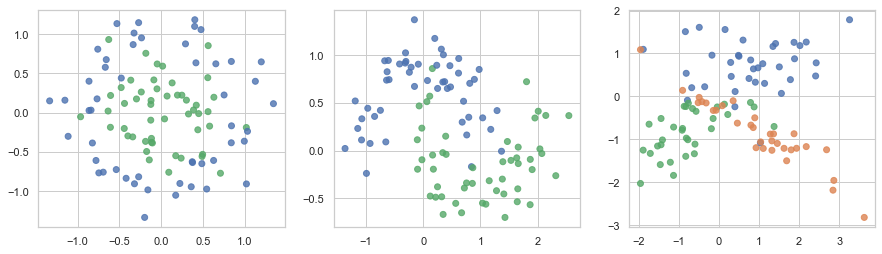

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y, ax = plt):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

Датасет make_circles

Accuracy make_circles train: 1.0 
Accuracy make_circles test: 0.8333333333333334


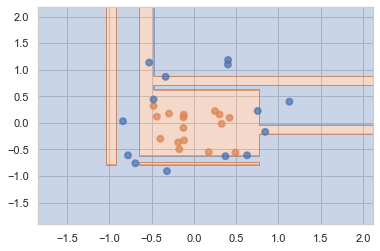

In [7]:
X1, y1 = datasets[0]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 15)
dt1 = DecisionTreeClassifier().fit(X1_train, y1_train)
plot_surface(dt1, X1_test, y1_test)
print('Accuracy make_circles train:', dt1.score(X1_train, y1_train), '\n''Accuracy make_circles test:', 
      dt1.score(X1_test, y1_test))

Датасет make_moons

Accuracy make_moons train: 1.0 
Accuracy make_moons test: 0.8


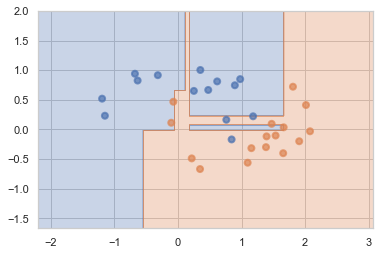

In [8]:
X2, y2 = datasets[1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 15)
dt2 = DecisionTreeClassifier().fit(X2_train, y2_train)
plot_surface(dt2, X2_test, y2_test)
print('Accuracy make_moons train:', dt2.score(X2_train, y2_train), '\n''Accuracy make_moons test:', dt2.score(X2_test, y2_test))

Датасет 3

Accuracy dataset3 train: 1.0 
Accuracy dataset3 test: 0.8


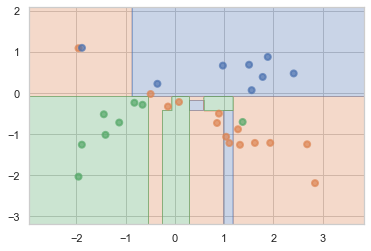

In [10]:
X3, y3 = datasets[2]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 15)
dt3 = DecisionTreeClassifier().fit(X3_train, y3_train)
plot_surface(dt3, X3_test, y3_test)
print('Accuracy dataset3 train:', dt3.score(X3_train, y3_train), '\n''Accuracy dataset3 test:', dt3.score(X3_test, y3_test))

__Ответ:__ Точность на обучающих объектах 100%, но на тестовой она уже ниже. Деревья достаточно переобучились, получившиеся области подстроились под обучающие объекты.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Регуляризация параметра max_depth

In [14]:
def change_max_depth(n):
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    dt_1 = DecisionTreeClassifier(max_depth = n).fit(X1_train, y1_train)
    dt_2 = DecisionTreeClassifier(max_depth = n).fit(X2_train, y2_train)
    dt_3 = DecisionTreeClassifier(max_depth = n).fit(X3_train, y3_train)
    plot_surface(dt_1, X1_test, y1_test, ax[0])
    plot_surface(dt_2, X2_test, y2_test, ax[1])
    plot_surface(dt_3, X3_test, y3_test, ax[2])
    ax[0].set_title('Make_circles with max_depth = {0}'.format(n))
    ax[1].set_title('Make_moons with max_depth = {0}'.format(n))
    ax[2].set_title('Dataset3 with max_depth = {0}'.format(n))
    print('Accuracy make_circles train:', dt_1.score(X1_train, y1_train), '\n''Accuracy make_circles test:', 
          dt_1.score(X1_test, y1_test), '\n')
    print('Accuracy make_moons train:', dt_2.score(X2_train, y2_train), '\n''Accuracy make_moons test:', 
          dt_2.score(X2_test, y2_test), '\n')
    print('Accuracy dataset3 train:', dt_3.score(X3_train, y3_train), '\n''Accuracy dataset3 test:', 
          dt_3.score(X3_test, y3_test))

Accuracy make_circles train: 0.7571428571428571 
Accuracy make_circles test: 0.6666666666666666 

Accuracy make_moons train: 0.9285714285714286 
Accuracy make_moons test: 0.8333333333333334 

Accuracy dataset3 train: 0.8714285714285714 
Accuracy dataset3 test: 0.9


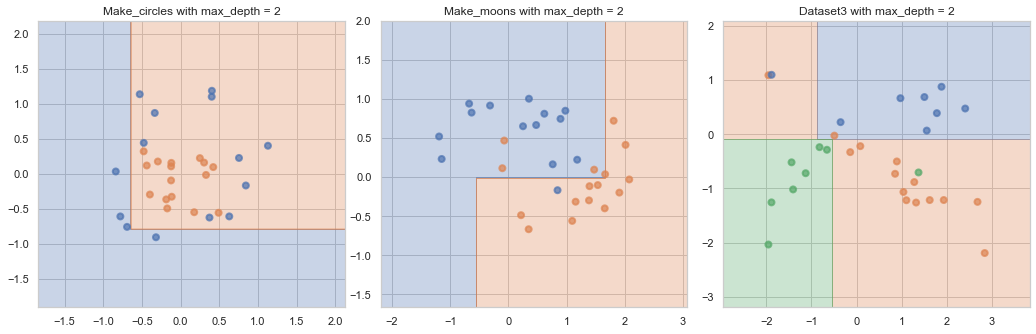

In [22]:
change_max_depth(2)

Accuracy make_circles train: 0.9285714285714286 
Accuracy make_circles test: 0.8666666666666667 

Accuracy make_moons train: 0.9714285714285714 
Accuracy make_moons test: 0.8333333333333334 

Accuracy dataset3 train: 0.9285714285714286 
Accuracy dataset3 test: 0.8333333333333334


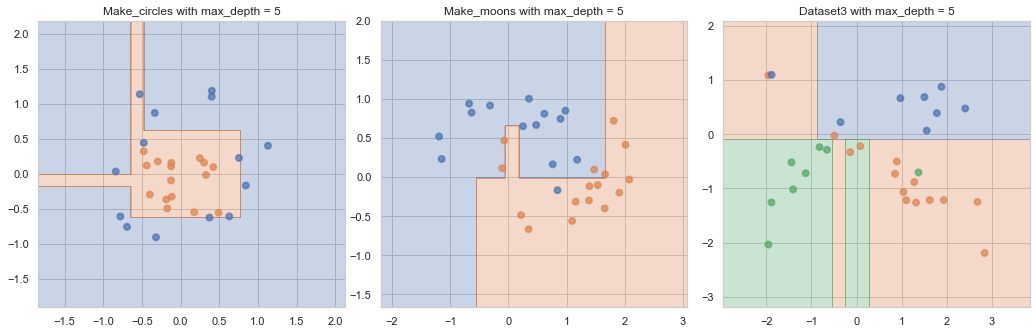

In [16]:
change_max_depth(5)

Accuracy make_circles train: 1.0 
Accuracy make_circles test: 0.8333333333333334 

Accuracy make_moons train: 1.0 
Accuracy make_moons test: 0.8 

Accuracy dataset3 train: 1.0 
Accuracy dataset3 test: 0.8


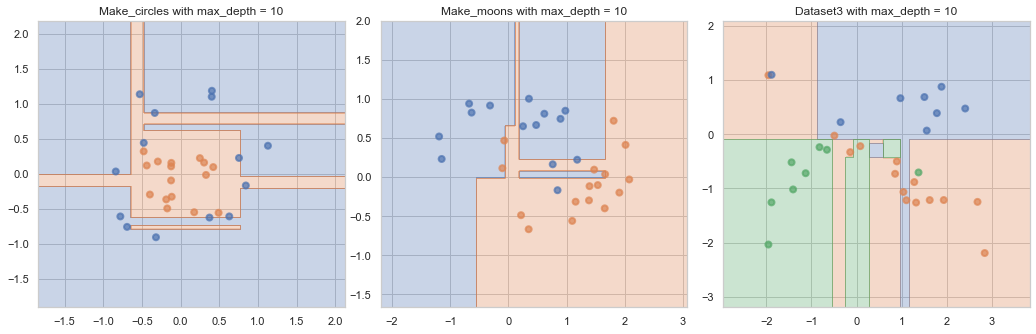

In [17]:
change_max_depth(10)

Регуляризация параметра min_samples_leaf

In [18]:
def change_min_samples_leaf(n):
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    dt_1 = DecisionTreeClassifier(min_samples_leaf = n).fit(X1_train, y1_train)
    dt_2 = DecisionTreeClassifier(min_samples_leaf = n).fit(X2_train, y2_train)
    dt_3 = DecisionTreeClassifier(min_samples_leaf = n).fit(X3_train, y3_train)
    plot_surface(dt_1, X1_test, y1_test, ax[0])
    plot_surface(dt_2, X2_test, y2_test, ax[1])
    plot_surface(dt_3, X3_test, y3_test, ax[2])
    ax[0].set_title('Make_circles with min_samples_leaf = {0}'.format(n))
    ax[1].set_title('Make_moons with min_samples_leaf = {0}'.format(n))
    ax[2].set_title('Dataset3 with min_samples_leaf = {0}'.format(n))
    print('Accuracy make_circles train:', dt_1.score(X1_train, y1_train), '\n''Accuracy make_circles test:', 
          dt_1.score(X1_test, y1_test), '\n')
    print('Accuracy make_moons train:', dt_2.score(X2_train, y2_train), '\n''Accuracy make_moons test:', 
          dt_2.score(X2_test, y2_test), '\n')
    print('Accuracy dataset3 train:', dt_3.score(X3_train, y3_train), '\n''Accuracy dataset3 test:', 
          dt_3.score(X3_test, y3_test))

Accuracy make_circles train: 1.0 
Accuracy make_circles test: 0.8333333333333334 

Accuracy make_moons train: 1.0 
Accuracy make_moons test: 0.8 

Accuracy dataset3 train: 1.0 
Accuracy dataset3 test: 0.8


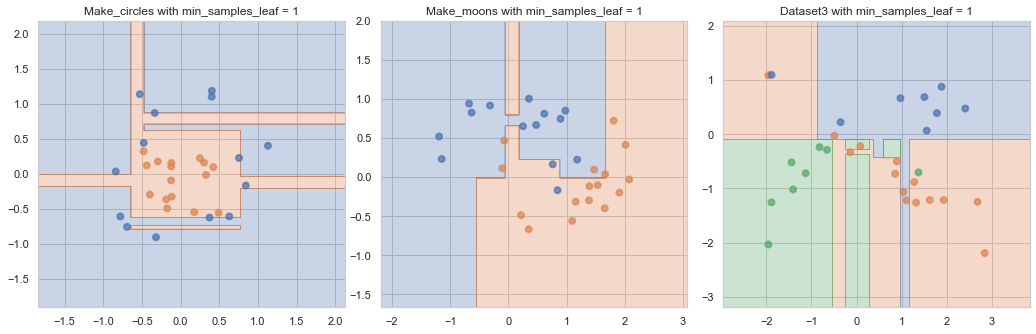

In [19]:
change_min_samples_leaf(1)

Accuracy make_circles train: 0.9 
Accuracy make_circles test: 0.9 

Accuracy make_moons train: 0.9428571428571428 
Accuracy make_moons test: 0.9 

Accuracy dataset3 train: 0.9142857142857143 
Accuracy dataset3 test: 0.8333333333333334


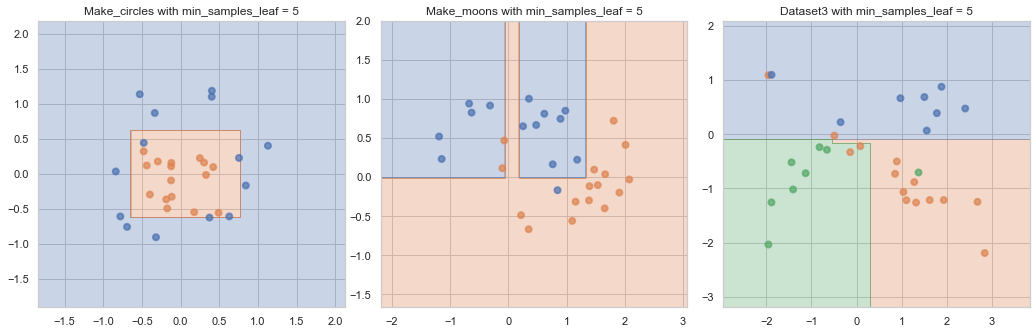

In [20]:
change_min_samples_leaf(5)

Accuracy make_circles train: 0.8571428571428571 
Accuracy make_circles test: 0.8333333333333334 

Accuracy make_moons train: 0.8857142857142857 
Accuracy make_moons test: 0.8 

Accuracy dataset3 train: 0.8571428571428571 
Accuracy dataset3 test: 0.9


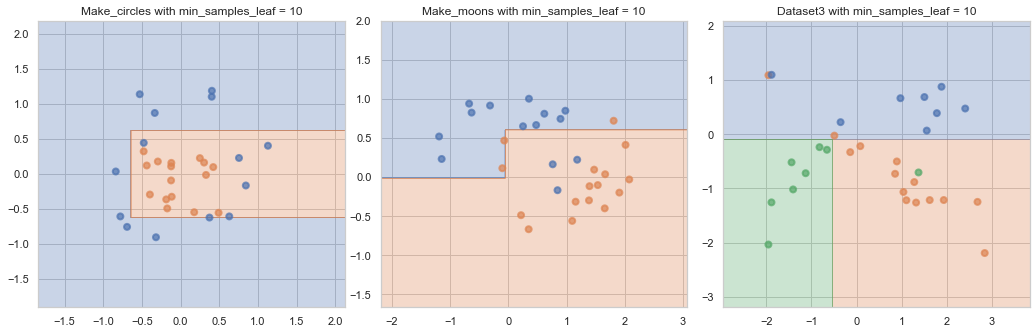

In [21]:
change_min_samples_leaf(10)

__Ответ:__ При увеличении максимальной глубины и уменьшении минимального количества объектов на узлах модель сильнее подстраивается под обучающую выборку. При, наоборот, уменьшении и увеличении соответственно рассматриваемых параметров обобщающая способность моделей растет. Для обеих моделей наилучшие и наихудшие показатели точности на тестовой выборке были показаны при одинаковых значениях рассматриваемых параметров.

# 2. Решающие деревья своими руками

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [23]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [24]:
ms = LabelEncoder()
for i in range(len(mushrooms.columns)):
    mushrooms.iloc[:, i] = ms.fit_transform(mushrooms.iloc[:, i])
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [80]:
target_mushrooms = np.array(mushrooms['p'])
others_mushrooms = np.array(mushrooms.drop('p', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(others_mushrooms, target_mushrooms, test_size = 0.5, random_state = 15)
dt_mushrooms = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy mushrooms test:', dt_mushrooms.score(x_test, y_test), '\n' 'Depth tree_mushrooms:', dt_mushrooms.get_depth())

Accuracy mushrooms test: 1.0 
Depth tree_mushrooms: 7


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [44]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [45]:
ttt = LabelEncoder()
for i in range(len(tic_tac_toe.columns)):
    tic_tac_toe.iloc[:, i] = ttt.fit_transform(tic_tac_toe.iloc[:, i])
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


Text(0.5, 1.0, 'Параметр min_samples_leaf')

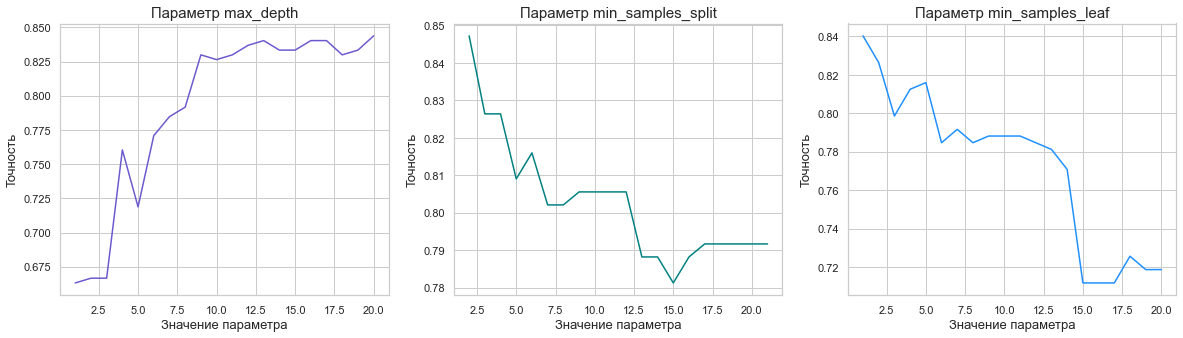

In [81]:
target_ttt = np.array(tic_tac_toe['positive'])
others_ttt = np.array(tic_tac_toe.drop('positive', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(others_ttt, target_ttt, test_size = 0.3, random_state = 15)
md_acc, mss_acc, msl_acc = np.zeros(20), np.zeros(20), np.zeros(20)
for i in range(20):
    dt_md = DecisionTreeClassifier(max_depth = i + 1).fit(x_train, y_train)
    dt_mss = DecisionTreeClassifier(min_samples_split = i + 2).fit(x_train, y_train)
    dt_msl = DecisionTreeClassifier(min_samples_leaf = i + 1).fit(x_train, y_train)
    md_acc[i] = dt_md.score(x_test, y_test)
    mss_acc[i] = dt_mss.score(x_test, y_test)
    msl_acc[i] = dt_msl.score(x_test, y_test)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))
xx = np.arange(1, 21)
xx_mss = np.arange(2, 22)
ax[0].plot(xx, md_acc, color = 'slateblue')
ax[1].plot(xx_mss, mss_acc, color = 'teal')
ax[2].plot(xx, msl_acc, color = 'dodgerblue')
ax[0].set_xlabel('Значение параметра', fontsize = 13)
ax[1].set_xlabel('Значение параметра', fontsize = 13)
ax[2].set_xlabel('Значение параметра', fontsize = 13)
ax[0].set_ylabel('Точность', fontsize = 13)
ax[1].set_ylabel('Точность', fontsize = 13)
ax[2].set_ylabel('Точность', fontsize = 13)
ax[0].set_title('Параметр max_depth', fontsize = 15)
ax[1].set_title('Параметр min_samples_split', fontsize = 15)
ax[2].set_title('Параметр min_samples_leaf', fontsize = 15)

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [72]:
car = pd.read_csv('car.data')
print(car['unacc'].unique())
car.head()

['unacc' 'acc' 'vgood' 'good']


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [73]:
car.loc[(car['unacc'] == 'unacc'), 'unacc'] = 'acc'
car.loc[(car['unacc'] == 'vgood'), 'unacc'] = 'good'
car['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [74]:
cars = LabelEncoder()
for i in range(len(car.columns)):
    car.iloc[:, i] = cars.fit_transform(car.iloc[:, i])
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,1
1724,1,1,3,2,0,1,0
1725,1,1,3,2,0,2,1


In [90]:
target_car = np.array(car['unacc'])
others_car = np.array(car.drop('unacc', axis = 1))

In [76]:
nursery = pd.read_csv('nursery.data')
print(nursery['recommend'].unique())
nursery.head()

['priority' 'not_recom' 'recommend' 'very_recom' 'spec_prior']


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [77]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [78]:
nurs = LabelEncoder()
for i in range(len(nursery.columns)):
    nursery.iloc[:, i] = nurs.fit_transform(nursery.iloc[:, i])
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1


In [91]:
target_nurs = np.array(nursery['recommend'])
others_nurs = np.array(nursery.drop('recommend', axis = 1))

In [92]:
print('Accuracy mushrooms:', cross_val_score(DecisionTreeClassifier(), others_mushrooms, target_mushrooms, cv = 10).mean(),'\n')
print('Accuracy tic_tac_toe:', cross_val_score(DecisionTreeClassifier(), others_ttt, target_ttt, cv = 10).mean(), '\n')
print('Accuracy car:', cross_val_score(DecisionTreeClassifier(), others_car, target_car, cv = 10).mean(), '\n')
print('Accuracy nursery:', cross_val_score(DecisionTreeClassifier(), others_nurs, target_nurs, cv = 10).mean())

Accuracy mushrooms: 0.9582898587606566 

Accuracy tic_tac_toe: 0.777752192982456 

Accuracy car: 0.9449522785320607 

Accuracy nursery: 0.9998456790123458
